# Schrodinger's Equation
Or, a journey to the quantum realm

<div>
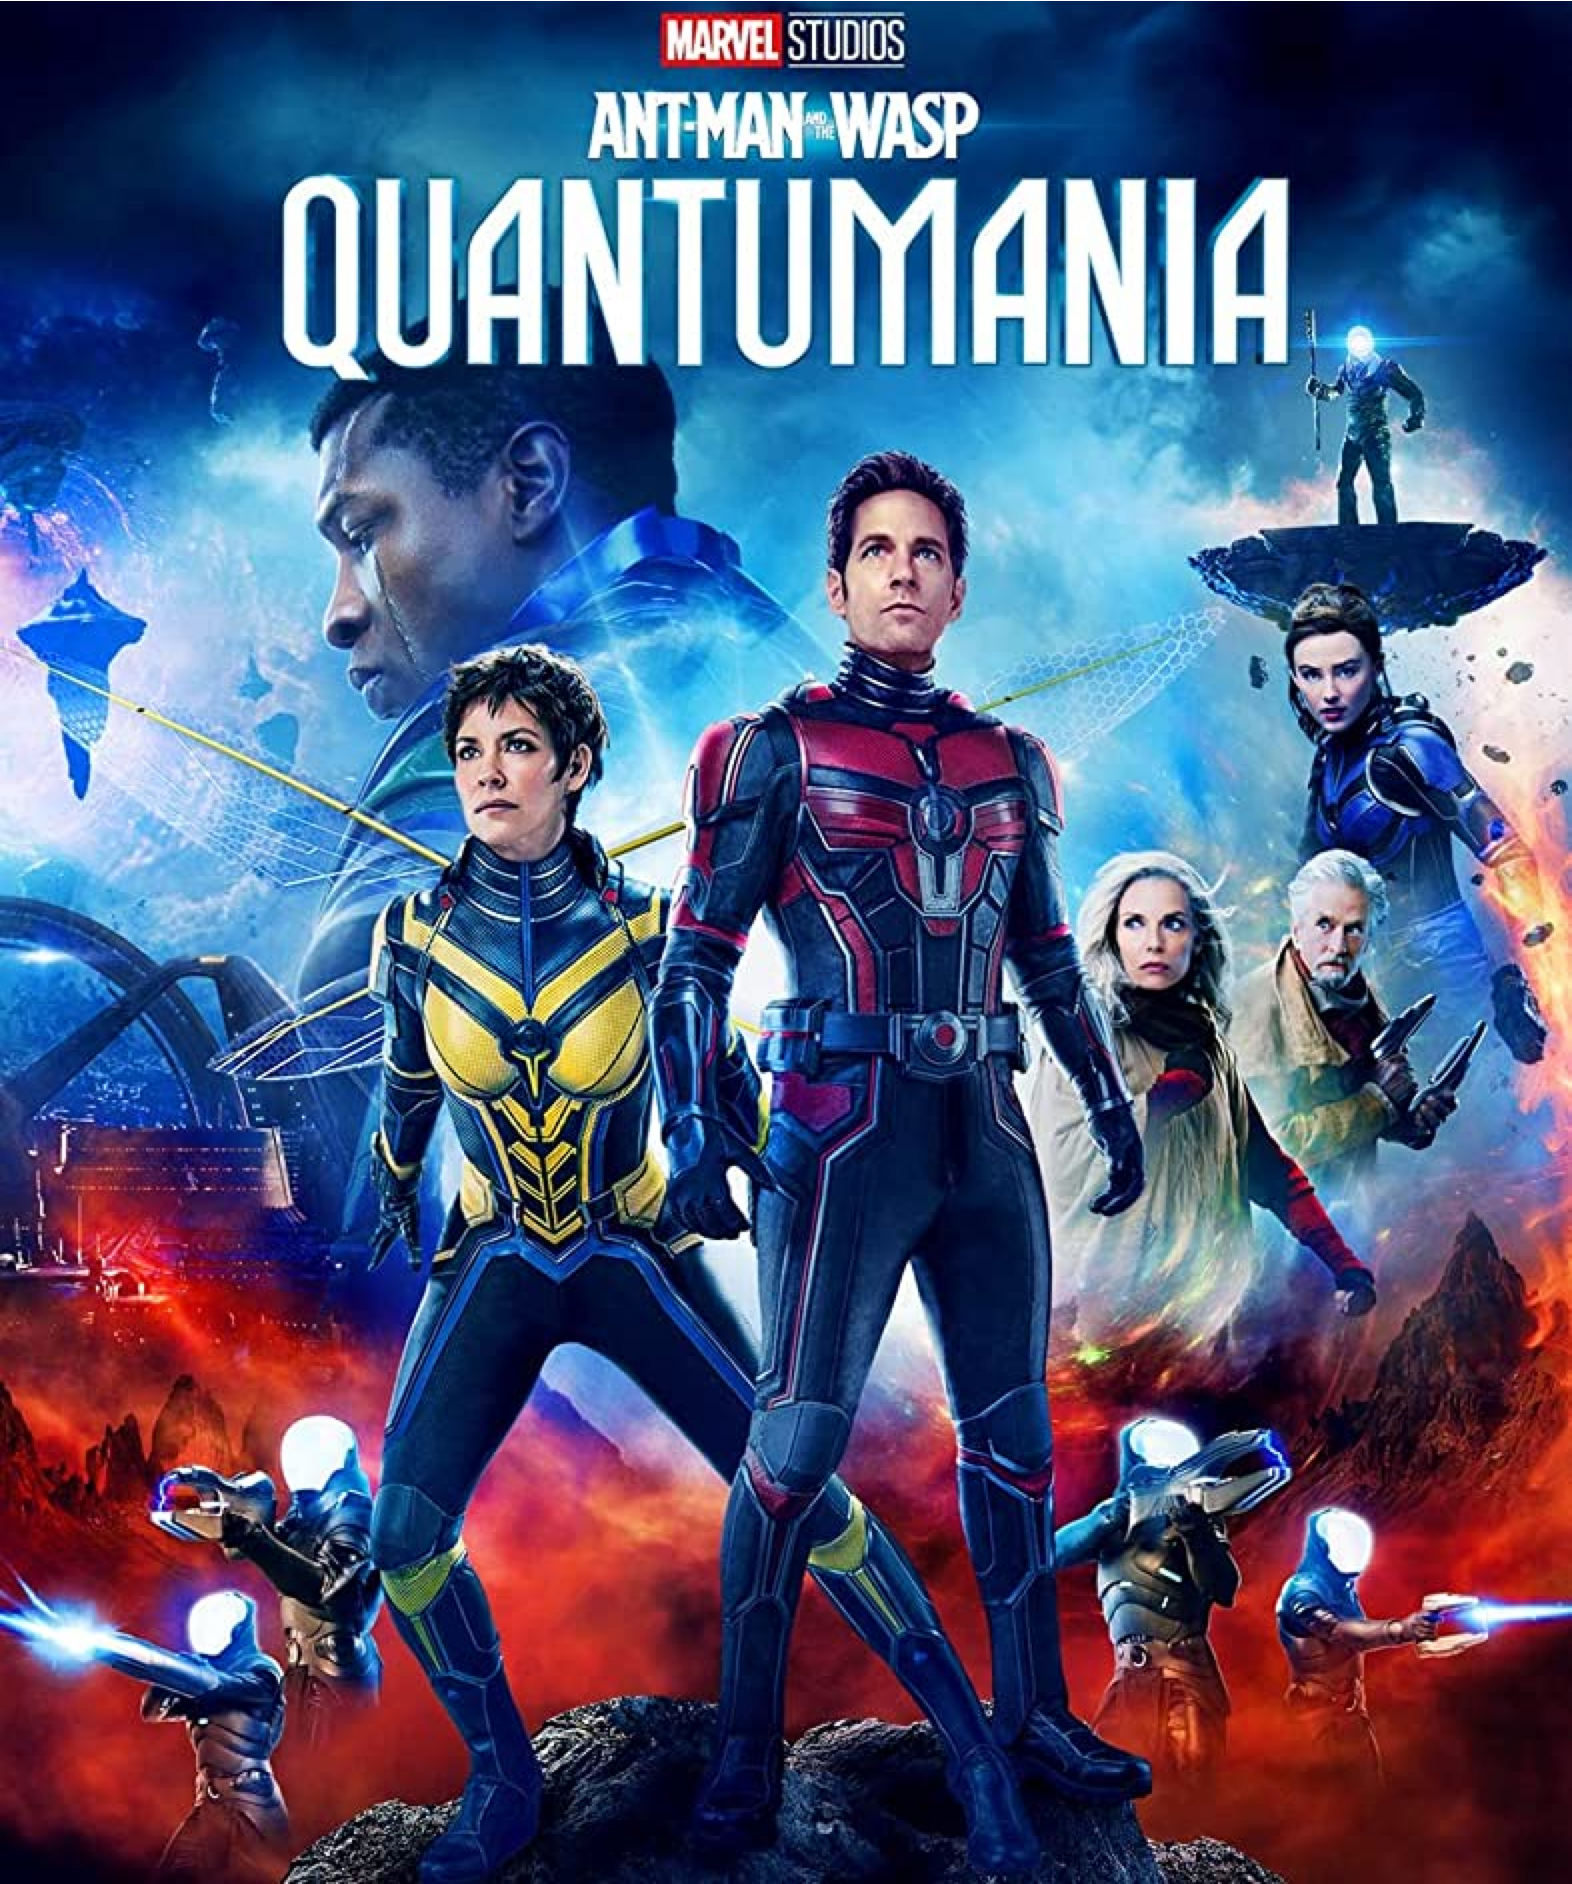
</div>

In this simulation, we will shrink ourselves down to explore the strange world of quantum mechanics including wave functions, quantum tunneling, eigenstates, and more!

**First things first, make sure you save this notebook to your drive so you can save your changes!!!**

<div>
<img src="save_to_drive.png" width="250"/>
</div>

### The Schrodinger equation and Hamiltonian

A *Hamiltonian* $H$ is a function (or more accurately, a differential operator) used often in physics which computes the total energy in a system.  The Hamiltonian tells us how the wavefunction evolves over time via Schrodinger's equation:

$$i\hbar\frac{d\Psi}{dt}=\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V\right]\Psi=H\Psi$$

To simplify things, in this simulation we will let $\hbar=m=1$

To simulate the Hamiltonian we need to discretize space and time to caclulate the derivatives appearing in the Schrodinger equation.  Instead of actually differentiating the function $\Psi$ (which might be quite complex), we evaulate it at two points and find the slope:

$$\frac{df}{dx}\approx\frac{f(x+h)-f(x)}{h}$$

<div>
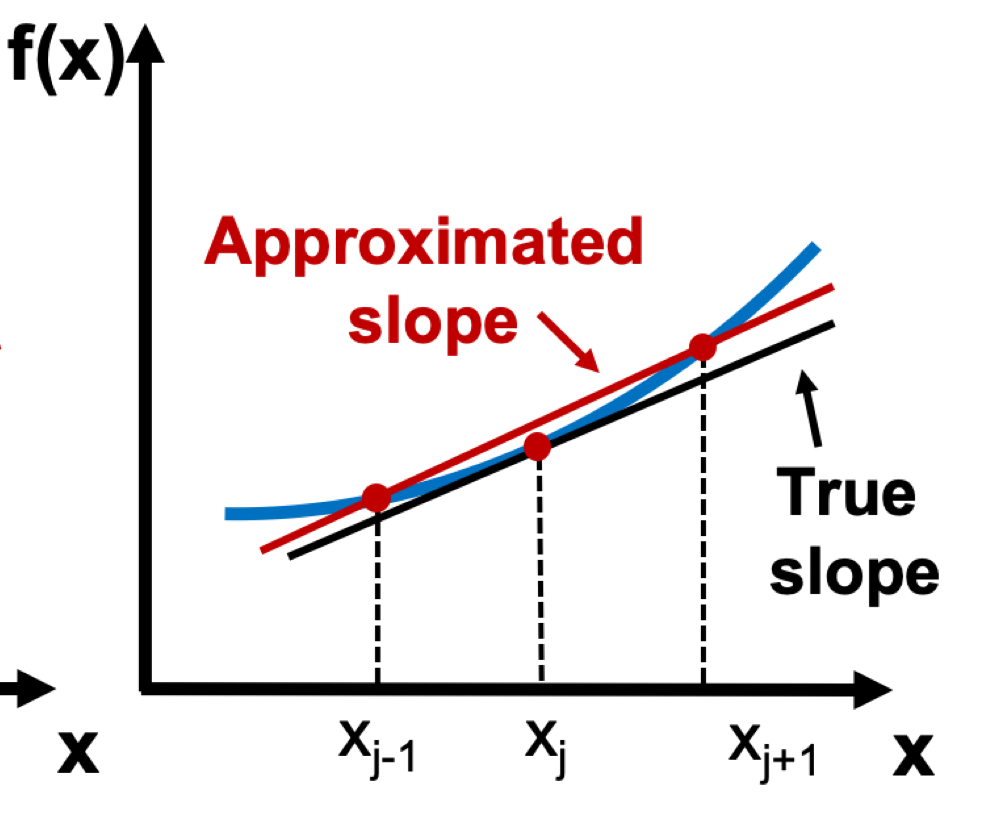
</div>

The code to compute Hamiltonians and evolve the wave function over time is already set up for you.  In this session, you will play with different initial wave functions $\Psi(t=0)$ and with different potentials $V$ and use the results to better understand the quantum world.

You should run the next two blocks without modification:

In [ ]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse


def hamiltonian(N, dx, V=None, is2D=False):
    """Returns Hamiltonian using finite differences.

    Args:
        N (int): Number of grid points.
        dx (float): Grid spacing.
        V (array-like): Potential. Must have shape (N,).
            Default is a zero potential everywhere.
        is2D (bool): if True, set up 2D finite difference
            In the 2D case, N is the number of points in each dimension.
            Therefore, the Hamiltonian has N^2 rows and columns.

    Returns:
        Hamiltonian as a numpy array with shape (N, N) or (N^2, N^2) for 2D simulation.
    """
    
    L = scipy.sparse.diags([1, -2, 1], offsets=[-1, 0, 1], shape=(N,N))
    if is2D:
        I = scipy.sparse.diags([1], offsets=[0], shape=(N,N))
        L = scipy.sparse.kron(I, L) + scipy.sparse.kron(L, I)
    H = -L / (2 * dx**2)
    if V is not None:
        H += scipy.sparse.spdiags(V, 0, H.shape[0], H.shape[0])
    return H.toarray()


In [ ]:
import scipy.linalg


def time_evolution_operator(H, dt):
    """Time evolution operator given a Hamiltonian and time step."""
    U = scipy.linalg.expm(-1j * H * dt)
    U[(U.real**2 + U.imag**2) < 1E-10] = 0
    return scipy.sparse.csc_matrix(U)


def simulate(psi, H, dt):
    """Generates wavefunction and time at the next time step."""
    U = time_evolution_operator(H, dt)
    t = 0
    while True:
        yield psi, t * dt
        psi = U @ psi
        t += 1

### Exercise 1: Probability density

The Schrodinger equation describes the *probability aplitude* (square root of probability) of a particle to be at each position on the x axis as a function of time.  To get the actual probability, we need to square a complex number.  Inside this function `probability_density`, write code that will compute the squared magnitude of a complex number $|z|^2=|a+ib|^2=a^2+b^2$.  You can use the *members* of the input variable `psi`: `psi.real` gives you $a$ and `psi.imag` gives you $b$.

In [ ]:
def probability_density(psi):
    """Position-space probability density.

    Arguments: 
     - psi: a complex number
     
    Returns:
     - the magnitude of psi
    """    
    return 0

In [ ]:
# Run this block of code to make sure that your probability density function works correctly

# if no errors are produced, then you can continue with the next part

result = probability_density(complex(0,0))
assert result==0., "Expected 0, got %.4f" %(result)

result = probability_density(complex(1,0))
assert result==1., "Expected 1, got %.4f" %(result)

result = probability_density(complex(0,1))
assert result==1., "Expected 1, got %.4f" %(result)

result = probability_density(complex(3,4))
assert result==25., "Expected 25, got %.4f" %(result)

result = probability_density(complex(4,3))
assert result==25., "Expected 25, got %.4f" %(result)

result = probability_density(complex(-12,-5))
assert result==169., "Expected 169, got %.4f" %(result)

result = probability_density(complex(-5,-12))
assert result==169., "Expected 169, got %.4f" %(result)

Note that writing tests like this is a great way to code!  In this course most tests will be written for you but it is something to consider in the future when you are writing your own code.


Next up we define a gaussian wavepacket.  This is a function which returns... another function?  This allows us to simply parameterize a family of functions.  We can make one guassian with a width of 1 and another with a width of 2, for example.  This allows us to reuse code and define a family of one-dimensional functions.

In [ ]:
def gaussian_wavepacket(x0, sigma0, p0):
    """Gaussian wavepacket at x0 +/- sigma0, with average momentum, p0."""
    def _packet(x):
        A = (2 * np.pi * sigma0**2)**(-0.25)
        return A * np.exp(1j*p0*x - ((x - x0)/(2 * sigma0))**2)
    return _packet

### Exercise 2: Make a plot

Try to make a plot of two different Gaussian functions using the `gaussian_wavepacket` function defined above.  For example, make a Gaussian centered at $x_0=-1$ with a width $\sigma_0=1$ and momentum $p_0=0$ (momentum doesn't quite matter yet because we are not yet animating these functions over time).  Make a second Guassian centered at $x_0=0$ with a width $\sigma_0=2$ and momentum $p_0=0$.  Overlay these two functions on the same plot with an x-axis ranging from -10 to 10.

You will need to use the following functions from the libraries we have imported:

 - `np.linspace(min, max, N)`: create a list of `N` linearly spaced points from `min` to `max`
 - `plt.plot(x, y)`: plot the data `x`, `y`.  `x` and `y` are both lists of points.  If called twice, two plots will show up.
 
This should take 5 lines of code.  Lines 1 and 2 to define the new Guassian functions, line 3 to define the linearly spaced x values, and lines 4 and 5 to plot each Gaussian.  Remember that the `gaussian_wavepacket` function returns a new function, so if you had stored the result in a variable `g` you can call it like `g(x)`

You may get some error about casting complex values to real but you can ignore this.

### Animation libraries

The following code block allows us to animate wave functions over time and make nice plots of them.

This code should not be modified!!!

In [ ]:
# Enable interactive plot
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# define the animation routine
def animate(psi0, V=lambda x: np.zeros_like(x), dt=1.0, xmin=-64, xmax=64, ymin=0, ymax=0.1, nFrames=100, Npts_x=1000, xmin_sim=1, xmax_sim=-1):

    if not isinstance(psi0, list):
        psi0 = [psi0]

    labels = []
    for p in psi0:
        labels.append([i for i, j in globals().items() if j is p][0])
        
    if xmin_sim > xmax_sim:
        xmin_sim = xmin
        xmax_sim = xmax

    fig, ax = plt.subplots(figsize=(8, 4.5))
    x, dx = np.linspace(xmin_sim, xmax_sim, Npts_x, endpoint=False, retstep=True)
    
    Vofx = V(x)                          # evaluate the potential
    Psi0ofx = [psi(x) for psi in psi0]   # evaluate the initial state at x
    
    
    lines = []
    for (p, l) in zip(Psi0ofx, labels):
        line, = ax.plot(x,p)     # A tuple unpacking to unpack each plot one by one
        lines.append(line)
        line.set_label(l)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel("x")
    ax.set_ylabel(r'$|\Psi|^2$')
    ax.legend(fontsize="14", loc='upper left')
    
    Vmax = max(Vofx)        # plotting V(x)
    if Vmax > 0:
        Vfactor = ymax/max(Vofx)
        ax2 = ax.twinx()
        ax2.fill_between(x, Vofx, color='#F68B74', alpha=0.5)
        ax2.plot(x, Vofx, 'r-')
        ax2.set_xlim(xmin, xmax)
        ax2.set_ylim(ymin, ymax/Vfactor*1.25)
        ax2.set_ylabel(r'V(x)')
        ax.text(xmin + (xmax-xmin)*0.85, ymax*0.8, r'$V(x)$', color="r", fontsize=16)

    H = hamiltonian(Npts_x, dx, Vofx)   # create the hamiltonian from the potential V
    
    sims = [simulate(p, H, dt) for p in Psi0ofx]  # simulate the wavefunction(s) in this potential
    
    def _frame(frame_num):
        for (line, sim) in zip(lines, sims):
            y = probability_density(next(sim)[0])
            line.set_data((x, y))
        return line
    
    anim = FuncAnimation(fig, _frame, frames=nFrames, interval=20, repeat=True)
    
    return anim


### Exercise 3: Propagating wave packets

An example of how to run the animation code is shown below:

In [ ]:
psi0 = gaussian_wavepacket(x0=0.0, sigma0=5.0, p0=1.0)
a = animate(psi0,xmin_sim=-64,xmax_sim=128)
a

By default the limits of the x axis will be $\pm64$ and the simulation will have the same bounds.  The edge of the simulation is a barrier, so to make the wave packet move off the screen without bumping in to the barrier we have added the parameters `xmin_sim=-64, xmax_sim=128`.

Try adding new cells below this one and simulate different initial wavepackets!

 - What happens if you make a wavepacket with initial momentum zero?
 - Overlay two wave packets and change variables, for example momentum or position, and see the result.  If you want to animate more than one wave function, you can pass them in a list to `animate([psi0, psi1...])`


### Exercise 4: Wave packet hits infinitely strong barrier

Now, let's bring the edge of the simulation in by removing the extra arguments we had in the first example.  In this exercise we will study what happens when the quantum particle is near a strong potential energy barrier and bounces off of it.

 - Removing the arguments `xmin_sim=-64, xmax_sim=128` altogether.
 - Create a gaussian wavepacket with $x_0=0$, $\sigma_0=5$, and $p_0=1$
 - Create a second wavepacket with $x_0=30$, $\sigma_0=5$, and $p_0=0.5$.  This has half the momentum of the other wave packet.
 - Animate it with the "animate" function.  Store the animation in an object
 - To run the animation, just write a single line of code with the name of the animation object as shown in the previous example.
 
Pause the simulation when the two waves are near the edge of the simulation window.  What is the relationship between the wavelength and momentum near the boundary?

The solution to Schrodinger's equation near the barrier looks like a sine wave with the energy of the wave packet determining the wavelength of the sine wave.  This is why we started by studying classical waves: the classical wave equation we studied is one solution to the Schrodinger equation.  Remember, the solution to a differential equation is a *function*.

### Exercise 5: Quadratic potential

So far we have studied the Schrodinger equation in the absence of any potential $V(x)$, and the case where $V(x)$ is infinitely strong at a boundary.  Now, let's use a more realistic function for $V(x)$ and see how the quantum particle responds

 - Define a new function $V(x)=\frac{1}{2}\left(\frac{x}{32}\right)^2$ using `def`
 - Simulate the same guassian wavepacket in this potential by passing your new function to animate as `animate(...V=yourFunctionName)`
 - If you need to run the animation longer, try adding the argument `dt=2` to the animation.  The other way is to add the argument `nFrames` and increase it to something large than its default value, `100`, but this will take longer to run
 
What happens now?  As always, you can play around with overlaying multiple wavefunctions with different properties.

### Exercise 6: Standing wave solutions to the quadratic potential

Using some math which is outside the scope of this course, we can derive exact standing wave solutions to the quadratic potential $V\propto x^2$.  The next block of code defines this function.

In [ ]:
from scipy import special

'''
This function gives the solutions to the quadratic potential.  kinv is 1/k.  In the case above we have k=32.
'''
def QuadraticSolution(n, kinv=32**2):
    omega=np.sqrt(1/kinv)
    def _f(x):
        coeff = 1/np.sqrt(np.power(2, n)*np.math.factorial(n))*np.power(omega/3.14159, 0.25)
        gaus  = np.exp(-0.5*omega*np.power(x, 2))
        herm  = special.hermite(n)(np.sqrt(omega)*x)
        return coeff*gaus*herm
    return _f

Plot different `QuadraticSolution` with different values for `n`.  Do not modify the other parameter, which is set to $32^2$ beceause of the quadratic potential we defined earlier.

We found *standing wave* solutions to for a quantum particle!  Now, set `nFrames` to a small number like 5 because, as you have hopefully already seen, the standing wave solutions are boring: they don't move at all!

Try plotting several standing waves all on one plot with `nFrames` set to a low number.  Is there a familiar relationship between $n$ and the number of nodes, as we saw in the lab on wave equations?

Each of these standing waves has a different energy.  This should make sense, since we know that energy is associated with the wavelength (or frequency) of the wave and it seems like when we increase the number $n$ we get more nodes.

These functions form a *basis*, meaning that all other solutions can be constructed as a *linear superposition* of these basis function shapes.  When we put a gaussian wavepacket in the quadratic potential, it shifted to the left and right over and over again, shifting between potential and kinetic energy.  As the particle moved and its kinetic energy changes, it becomes a different combination of these basis shapes, which is why the animation moves at all over time.  The concept of a basis is an important one in quantum theory.

Compared to a classical particle, these results are *weird*.  A classical particle admits only one "standing" solution: the particle sits at $x=0$ and doesn't move at all.  A quantum particle has an infinite number of ways it can "stand still", each with higher and higher energy.

### Exercise 7: Quantum tunneling

Previously we threw the quantum particle at an infinitely strong barrier and saw some weird things happen.  Let's make a barrier which has twice the size of the kinetic energy of the incident particle this time instead.

 - Define a variable for the momentum of the incident particle $p_0=1$
 - Note that our particle has mass $m=1$, so its kinetic energy is $p_0^2/2$
 - Define a function for the barrier $V(x)$ which has 2 times as much energy as the particle's kinetic energy
 $$ V(x)= \left\{
 \begin{array}{11}
     p_0^2 & |x|<1 \\
     0 & \text{otherwise}
 \end{array}
 \right. $$
 - Use a `gaussian_wavepacket` with $x_0=-40$, $\sigma_0=3$, and $p0=1$
 - Animate this wave packet with $V$ equal to the barrier function defined above.  Use the arguments `xmin_sim=-128, xmax_sim=128`


What on earth is going on???

A classical particle with energy $p_0^2/2$ would *always* bounce off a barrier with energy $p_0^2$ because it can't pay the energy "price" to keep moving to the right.  It should bounce off and end up moving to the left.

Most of the probability function for our quantum particle does this, but some of it actually leaks through the potential barrier.  If we had a setup in the lab to perform this experiment, we would find that some small fraction of the time the quantum particle would go right through the barrier like it wasn't even there at all!!

This process is called *quantum tunneling* and it really does happen in nature!

### Exercise 8: Atomic energy levels

Earlier, we studied standing wave solutions to the potential $V=x^2$.  This problem was studied because it describes many physical systems very well.  We will now conclude with one more example: atoms.

Atoms have a potential $V\propto 1/r$ where $r=\sqrt{x^2+y^2+z^2}$ in three spatial dimensions.  Simulating the schrodinger equation in 3D is very time consuming, and hard to visualize.  We will take 2D slices of the standing wave solutions and plot them.

In [ ]:
'''
This function plots a 2D function nicely.  Takes care of mesh grids and color bar.
Arguments:
 - psi0: the function to plot
 - xmin: the minimum value of x and y to be plotted
 - xmax: the maximum value of x and y to be plotted
 - Npts: number of points (in each dimension) to be plotted
 - zmin: user defined lower limit on z axis
 - zmax: user defined upper limit on z axis.  If zmax < zmin, then the axes will automatically be set
 - logZ: log scale on the Z axis.  Recommended for plotting atomic orbital wave functions.
'''
def plot2D(psi0,xmin=-20, xmax=20, zmin=0, zmax=-1, Npts=100, logZ=True):

    fig, ax = plt.subplots(figsize=(8, 4.5))
    x, dx = np.linspace(xmin, xmax, Npts, endpoint=False, retstep=True)
    
    X, Y = np.meshgrid(x, x, indexing='xy')
    
    Psi = probability_density(psi0(X,Y))
    scale = np.amax(Psi)
    if logZ:
        with np.errstate(divide='ignore'):
            Psi = np.where(Psi/scale > 0.0000000001, np.log10(Psi), np.log10(scale)-10)
    
    if zmax < zmin:
        zmax = np.amax(Psi)
        zmin = np.amin(Psi)
    
    image = ax.imshow(Psi, vmin=zmin, vmax=zmax, extent=(xmin,xmax,xmin,xmax))
    fig.colorbar(image, ax=ax)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel("x")
    ax.set_ylabel("y")


In [ ]:
from scipy.special import assoc_laguerre, sph_harm

'''
This function returns the (n, l, m) standing wave solution to the Coulomb potential in a 2D slice.
'''
def hydrogen_atom(n, l, m):
    if not n > 0:
        print("Invalid choice of n, l, m.  n must be a postive integer")
        return None
    if not l >= 0:
        print("Invalid choice of n, l, m.  l must be a positive integer")
        return None
    if not l < n:
        print("Invalid choice of n, l, m.  l must be strictly less than n")
        return None
    if not np.abs(n) > l:
        print("Invalid choice of n, l, m.  |m| must be less than or equal to l")
        return None
    def _hydrogen_atom(x, y):
        r = np.sqrt(x*x+y*y+1)
        coeff = np.sqrt(8/(n*n*n)*np.math.factorial(n-l-1)/2/n/(np.power(np.math.factorial(n+l),3)))
        expon = np.exp(-r/n)*np.power(2*r/n,l)
        Lterm = assoc_laguerre(2*r/n, n-l-1, 2*l+1)
        Ylm   = sph_harm(m, l, np.arctan(y/(x+0.0001)), np.arccos((x*x+y*y)/(x*x+y*y+1)))
        return coeff*expon*Lterm*Ylm
    return _hydrogen_atom

Try plotting the first few atomic orbitals.  What patterns do you see?  

The atomic nucleus is at $(0,0)$ on this plot.  The electron is attracted to the atomic nucleus because they have opposite electric charge.  The attraction force is derived from the Coulomb potential, which is $V\propto 1/(x^2+y^2)$.  Given this information, would you expect that all electrons are "bound" to the atom with the same force?  Or, should electrons in different states be bound with different energies?

### References:


http://www.astro.utoronto.ca/~mahajan/notebooks/quantum_tunnelling.html


https://towardsdatascience.com/matplotlib-animations-in-jupyter-notebook-4422e4f0e389


https://artmenlope.github.io/solving-the-2d-schrodinger-equation-using-the-crank-nicolson-method/


"Introduction to Quantum Mechanics" David Griffiths